In [1]:
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt

In [136]:
class Step:
    def __init__(self,name,parameters):
        self.name = name
        self.parameters = parameters
        
class Node:
    def __init__(self,id,N):
        self.id = id
        self.V = [0]*N
        self.L = self.id
        self.exchanged_messages = 0
        self.rounds = 0
        self.nextSteps = []
        self.nextSteps.append(Step("broadcast",-1)) # FIFO 
        
    def stillHasIterations(self):
        return len(self.nextSteps) > 0
    
    def iterate(self,nodes):
        last_steps = self.nextSteps.copy()
        self.nextSteps = []
        for step in last_steps:
            #print("step is {}".format(step.name))
            if step.name == "broadcast":
           #     print("Brodcasting")
                self.broadcast(nodes,j=step.parameters)
            elif step.name == "sendBackTo":
          #      print("SENDBKACTO")
                self.sendBackTo(step.parameters,nodes)
            
    def broadcast(self,nodes,j=-1):
        for node in nodes:
            if node.id != self.id:
                self.exchanged_messages += 1
         #       print("Node {} send {} to {}".format(self.id,self.L,node.id))
                if j != -1 and node.id != j:
                    #print("Node {} send {} to {}".format(self.id,self.L,node.id))
                    node.receiveLj(self.id,self.L,nodes)
                else:
                    node.receiveLj(self.id,self.L,nodes)
                
    def sendBackTo(self,j,nodes):
        self.exchanged_messages += 1
        #print("Node {} send back to {}".format(self.id,self.L,j))
        nodes[j].receiveLj(self.id,self.L,nodes,response=False) # avoid infinite responses

    def receiveLj(self,j,Lj,nodes,response=True):
        #self.exchanged_messages += 1
        self.rounds +=1
        #print("Node {}: received {} from node:{}".format(self.id,Lj,j))
        if Lj < self.L:
            self.L = Lj
            self.V[j] = Lj
            self.nextSteps.append(Step("broadcast",j))
            #print("    So now value of node{} is {} -> broadcast".format(self.id,Lj))

        elif self.L == Lj:
            #print("SAME VALUE")
            self.V[j] = Lj
            if response:
                self.nextSteps.append(Step("sendBackTo",j))
                #print("    Same value found -> response".format(Lj))

In [137]:
def continueIterations(nodes):
    for node in nodes:
        if node.stillHasIterations():
            return True
    return False

In [143]:
def simulate(N,mode="normal"):
    nodes = [Node(i,N) for i in range(0,N)]
    if mode == "random":
        shuffle(nodes)
    elif mode == "reverse":
        nodes.reverse()
    elif mode == "normal":
        pass
    else:
        print("Mode {} not supported".format(mode))
        
    rounds = 1
    while continueIterations(nodes): #
        #print("Round "+str(rounds))
        for node in nodes:
            #print("Iterating node "+str(node.id))
            node.iterate(nodes)
        rounds+=1
        
    messages = 0
    #sum
    for node in nodes:
        messages += node.exchanged_messages
    return messages,rounds

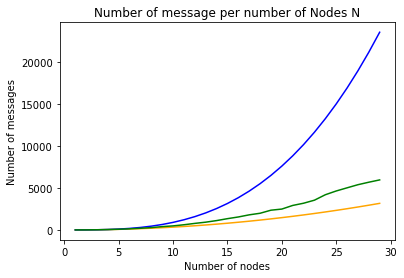

In [156]:
#comparing random, ascending and descending order
N = 30

values_random = []
values_normal = []
values_reverse = []

for n in range(1,N):
    messages,rounds = simulate(n,"normal")
    values_normal.append(messages)
    messages,rounds = simulate(n,"reverse")
    values_reverse.append(messages)

for n in range(1,N):
    messages = []
    rounds = []
    for i in range(100):
        m,r = simulate(n,"random")
        messages.append(m)
        rounds.append(r)
    messages = np.array(messages)
    mean = np.mean(messages)
    values_random.append(mean)
    
Ns = [i for i in range(1,N)]
plt.plot(Ns,values_normal,"orange")
plt.plot(Ns,values_reverse,"blue")
plt.plot(Ns,values_random,"green")
plt.title("Number of message per number of Nodes N")
plt.xlabel("Number of nodes")
plt.ylabel("Number of messages")
plt.show()

In [152]:
print("{:5} | {:5} | {:5} | {:5} | {:5} ".format("N","Rounds","Min","Mean","Max"))
print("-"*40)
means = []
N = 11
for n in range(1,N):
    messages = []
    rounds = []
    for i in range(100):
        m,r = simulate(n,"random")
        messages.append(m)
        rounds.append(r)
    messages = np.array(messages)
    mean = np.mean(messages)
    means.append(mean)
    min = messages.min()
    max = messages.max()
    rounds = np.array(rounds)
    #rounds = "X"
    print("{:5} | {:5}  | {:5} | {:5.0f} | {:5} ".format(n,rounds.max(),min,mean,max))
    print("-"*40)

N     | Rounds | Min   | Mean  | Max   
----------------------------------------
    1 |     2  |     0 |     0 |     0 
----------------------------------------
    2 |     3  |     4 |     4 |     5 
----------------------------------------
    3 |     4  |    16 |    18 |    20 
----------------------------------------
    4 |     4  |    36 |    43 |    51 
----------------------------------------
    5 |     4  |    64 |    80 |   104 
----------------------------------------
    6 |     4  |   100 |   130 |   177 
----------------------------------------
    7 |     4  |   144 |   201 |   277 
----------------------------------------
    8 |     4  |   196 |   279 |   402 
----------------------------------------
    9 |     4  |   256 |   379 |   611 
----------------------------------------
   10 |     4  |   333 |   485 |   788 
----------------------------------------


1N**2 -1N + 0


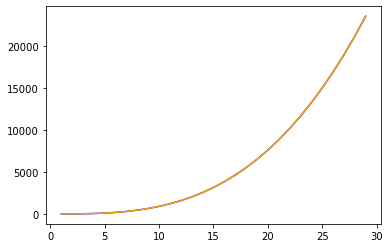

In [182]:
coeffs = np.polyfit(Ns,values_reverse,3)
print("{:.0f}N**3 +{:.0f}N**2 + {:.0f} ".format(coeffs[0],coeffs[1],coeffs[2]))
fit = [ apply3(n,coeffs) for n in Ns] 
plt.plot(Ns,values_reverse,"blue")
plt.plot(Ns,fit,"orange")
plt.show()

In [109]:
Ns = [i for i in range(1,N)]
coeffs = np.polyfit(Ns,means,2)



In [179]:
def apply(x,coeffs):
    return coeffs[0] * x ** 2 + coeffs[1]*x + coeffs[2]

def apply3(x,coeffs):
    return coeffs[0] * x ** 3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[0]

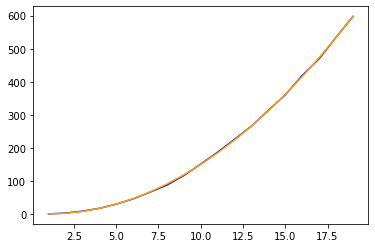

In [111]:
fit = [ apply(n,coeffs) for n in Ns] 
plt.plot(Ns,means,"blue")
plt.plot(Ns,fit,"orange")
plt.show()

In [124]:
for i in range(1,N):
    print("N = {:4} : {:4.0f} O()={:5}".format(i,apply(i,coeffs),(i**2)-i))

N =    1 :   -0 O()=    0
N =    2 :    2 O()=    2
N =    3 :    7 O()=    6
N =    4 :   17 O()=   12
N =    5 :   30 O()=   20
N =    6 :   46 O()=   30
N =    7 :   66 O()=   42
N =    8 :   90 O()=   56
N =    9 :  118 O()=   72
N =   10 :  150 O()=   90
N =   11 :  185 O()=  110
N =   12 :  223 O()=  132
N =   13 :  266 O()=  156
N =   14 :  312 O()=  182
N =   15 :  362 O()=  210
N =   16 :  415 O()=  240
N =   17 :  473 O()=  272
N =   18 :  534 O()=  306
N =   19 :  598 O()=  342
